In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.shape

(3276, 10)

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#EXPLORATORY DATA ANALYSIS(EDA)

#DATA CLEANING

##Checking duplicates

In [8]:
df.duplicated().sum()

0

#Checking null values

In [9]:
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df.Potability.value_counts()


0    1998
1    1278
Name: Potability, dtype: int64

In [11]:

df = df.dropna()


In [12]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [13]:

df.shape


(2011, 10)

In [14]:
df.Potability.value_counts()


0    1200
1     811
Name: Potability, dtype: int64

In [15]:
df_notpotable  = df[df['Potability']==0]
df_potable = df[df['Potability']==1] 

In [16]:
df_notpotable.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [17]:
df_potable.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1


In [18]:
df_potable_resample = resample(df_potable, replace = True, n_samples = 1200, random_state = 0)


In [19]:
df_potable_resample.shape


(1200, 10)

In [20]:
df = pd.concat([df_notpotable, df_potable_resample])


In [21]:
df.shape


(2400, 10)

In [22]:
df.Potability.value_counts()


0    1200
1    1200
Name: Potability, dtype: int64

In [23]:
df = shuffle(df, random_state=0) 


#Checking outliers

#using boxplot

In [24]:
# Scale the data
Scaler = StandardScaler()
scaled_df = Scaler.fit_transform(df.drop(columns=["Potability"]))

# Calculate IQR and identify outliers
Q1 = np.percentile(scaled_df, 25, axis=0)
Q3 = np.percentile(scaled_df, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = np.where((scaled_df < lower_bound) | (scaled_df > upper_bound))
num_outliers = len(np.concatenate(outliers))
print("Number of outliers:", num_outliers)

# Define function to detect outliers using IQR method
def detect_outlier_iqr(data):
    # Calculate quartiles and IQR
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    
    # Identify outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

 # Apply the function to each row of the dataset and count the number of outliers
    df_copy = df.copy()
    cols_to_check = df.columns[0:-1]
    df_copy['outlier_count'] = df_copy[cols_to_check].apply(lambda row: len(detect_outlier_iqr(row)), axis=1)

# Filter out rows with more than two outliers
    df_copy = df_copy[df_copy['outlier_count'] <= 2]

# Drop the outlier count column
    df_copy = df_copy.drop(columns=['outlier_count'])

Number of outliers: 564


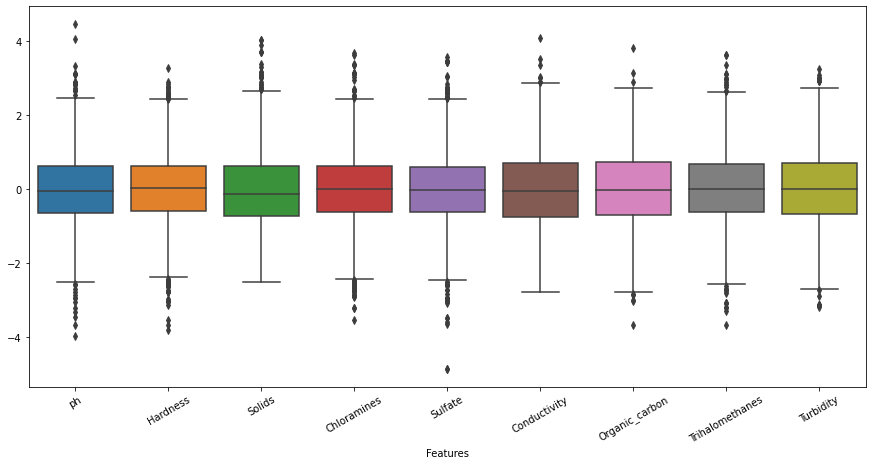

In [25]:
# Visualize the data without outliers
df_copy = df.copy()


Scaler = StandardScaler()
scaled_df = Scaler.fit_transform(df_copy.drop(columns=["Potability"]))
plt.figure(figsize=[15, 7])
sns.boxplot(data=scaled_df, orient="v")
plt.xticks(np.arange(9), df.columns[0:-1], rotation=30)
plt.xlabel('Features')
plt.show()

#Data Visualization

Text(0.5, 1.0, 'Distribution of Potability')

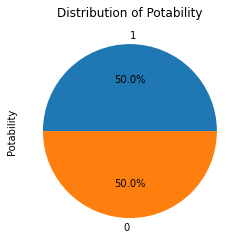

In [26]:
df['Potability'].value_counts(normalize=True).plot.pie(autopct='%.1f%%')
plt.title('Distribution of Potability')

In [27]:
correlation = df.corr
correlation()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.102895,-0.079439,0.013486,-0.011497,-0.005527,0.023383,0.025592,-0.058618,0.019509
Hardness,0.102895,1.000000,-0.045850,-0.038243,-0.089973,0.031841,0.014747,-0.023624,-0.042488,-0.016310
Solids,-0.079439,-0.045850,1.000000,-0.103770,-0.196954,-0.007045,-0.057220,-0.019371,0.026599,0.033281
Chloramines,0.013486,-0.038243,-0.103770,1.000000,0.007236,-0.048524,-0.019874,0.021320,-0.014017,0.027323
Sulfate,-0.011497,-0.089973,-0.196954,0.007236,1.000000,-0.031954,0.043175,-0.042994,0.006473,-0.029005
Conductivity,-0.005527,0.031841,-0.007045,-0.048524,-0.031954,1.000000,0.019384,0.022193,0.027594,-0.019942
Organic_carbon,0.023383,0.014747,-0.057220,-0.019874,0.043175,0.019384,1.000000,0.002396,-0.013114,-0.007996
Trihalomethanes,0.025592,-0.023624,-0.019371,0.021320,-0.042994,0.022193,0.002396,1.000000,-0.009727,0.029260
Turbidity,-0.058618,-0.042488,0.026599,-0.014017,0.006473,0.027594,-0.013114,-0.009727,1.000000,-0.007687
Potability,0.019509,-0.016310,0.033281,0.027323,-0.029005,-0.019942,-0.007996,0.029260,-0.007687,1.000000


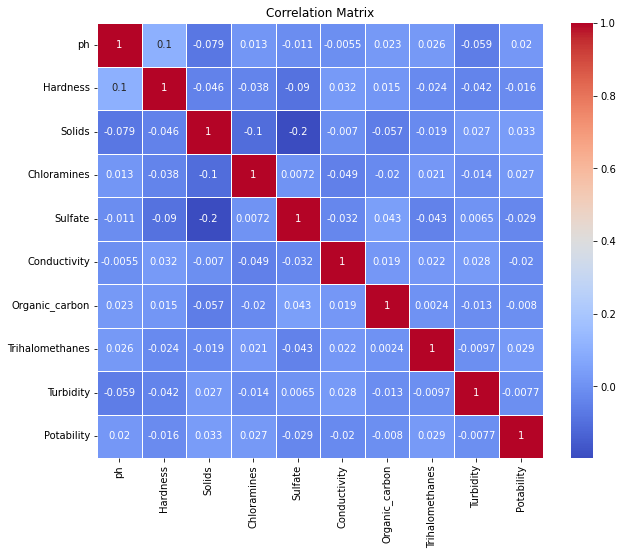

In [28]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=[10, 8])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


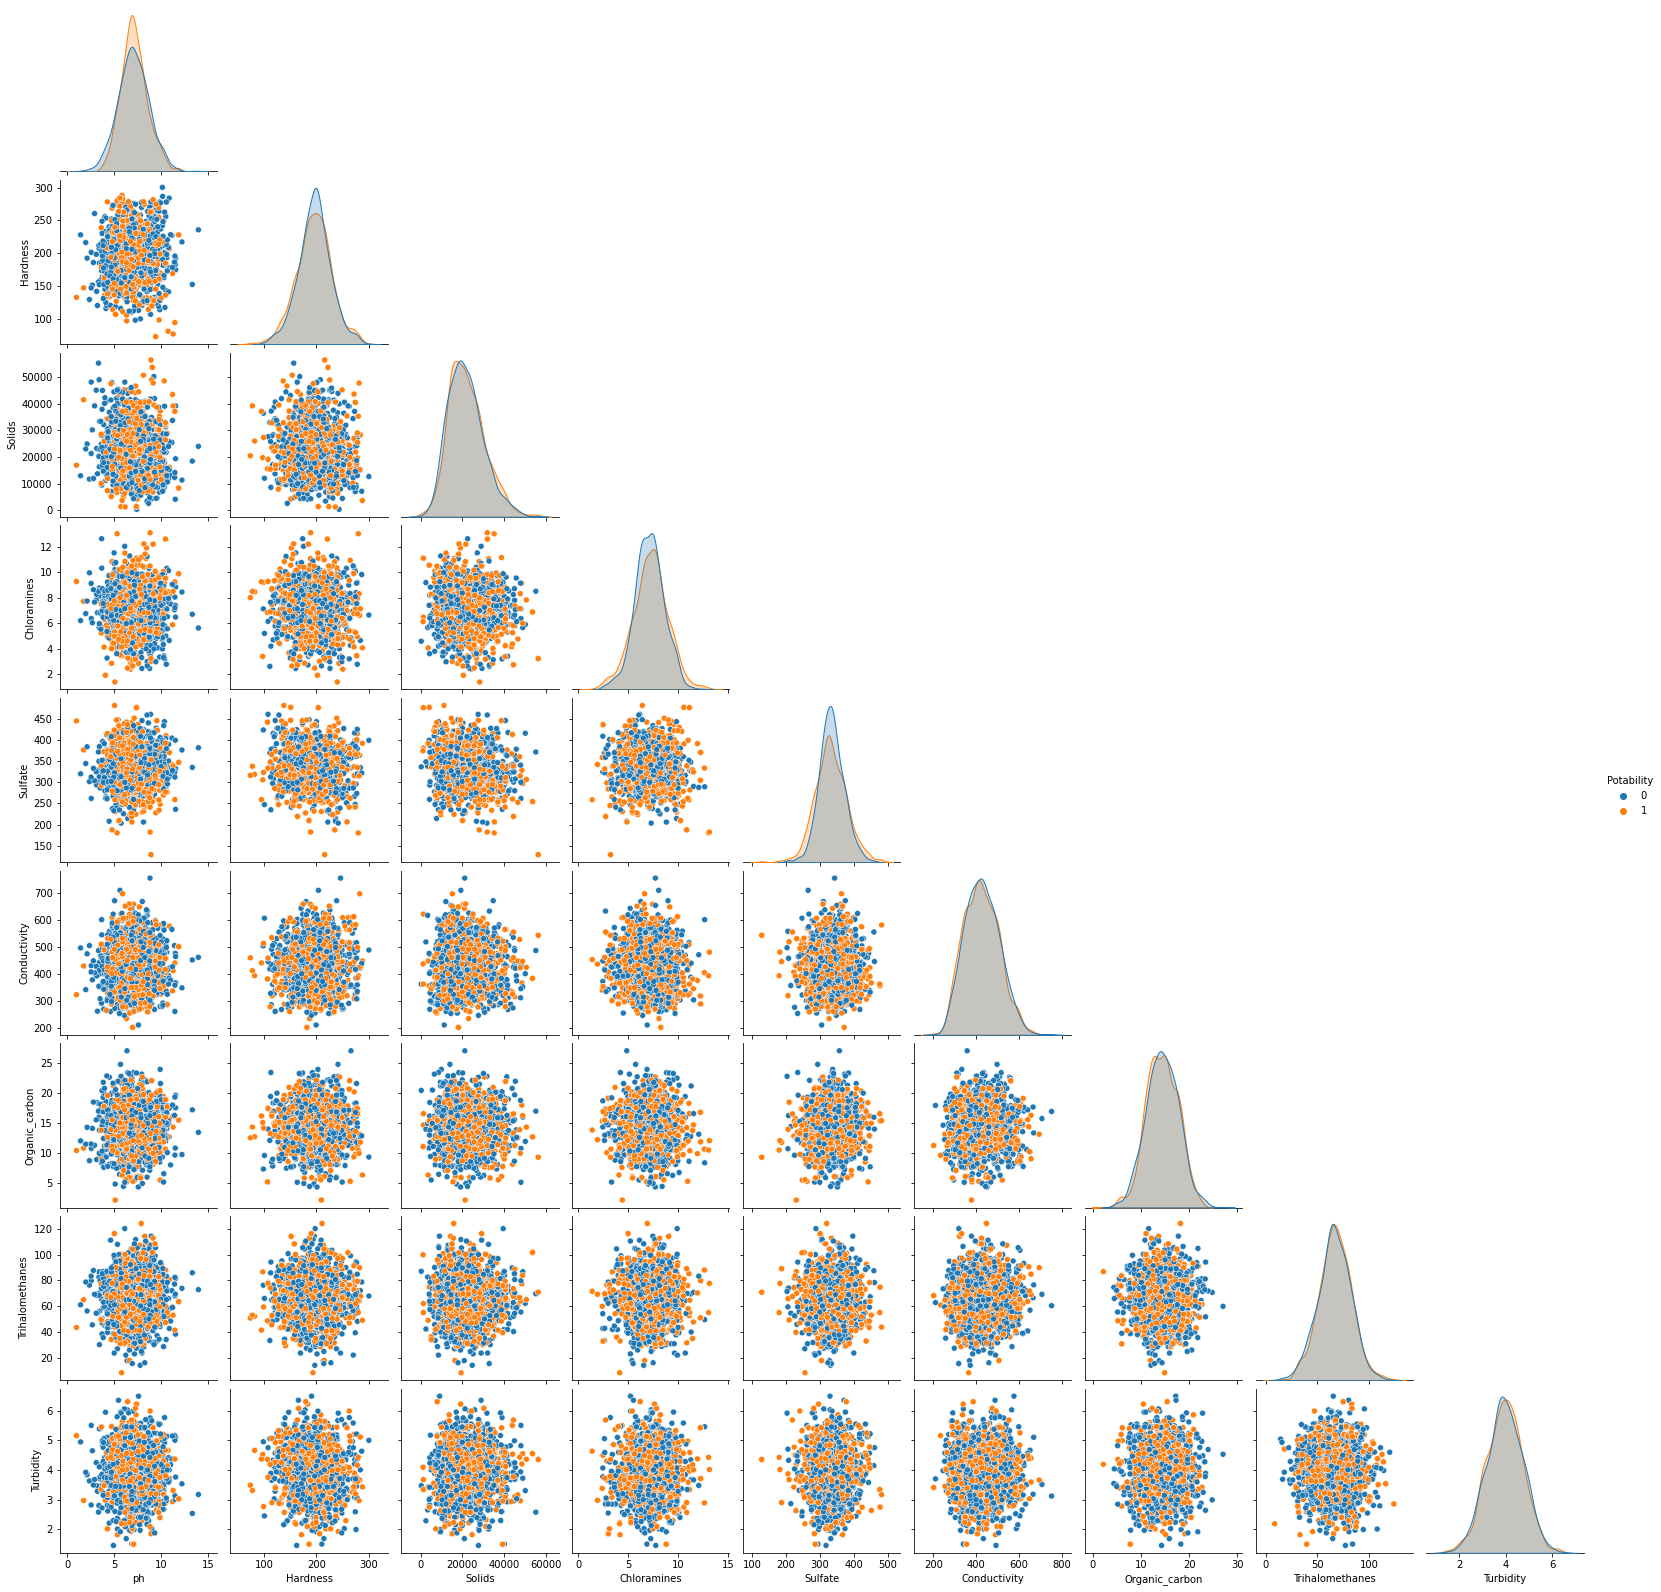

In [29]:
sns.pairplot(data=df, hue="Potability", corner=True)

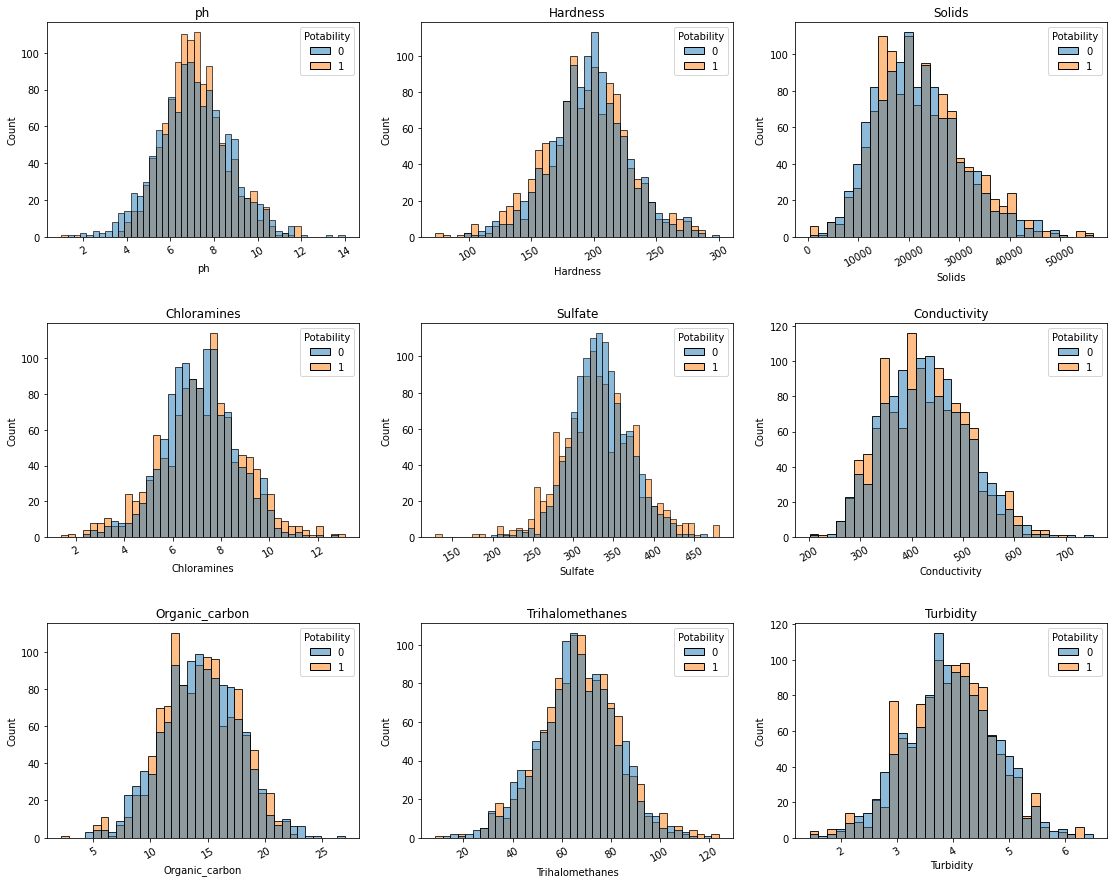

In [30]:
fig, ax = plt.subplots(3, 3, figsize=(19, 15))
features = df.columns[0:-1]

for i in range(3):
    for j in range(3):
        ax[i, j].set_title(features[i*3+j])
        sns.histplot(data=df, x=features[i*3+j], hue="Potability", ax=ax[i, j])
        ax[i, j].tick_params(axis='x', rotation=30) # rotate x-axis labels

plt.subplots_adjust(hspace=0.4) # increase height between subplots


#FEATURE ENGINEERING

In [31]:
x = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [32]:
st = StandardScaler()
x_columns= x.columns
x[x_columns] = st.fit_transform(x[x_columns])

In [33]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3225,0.886836,-1.959760,-0.101990,0.520706,0.298084,-0.811575,-1.094072,-0.140666,-1.367187
561,-0.305747,-0.728478,-0.819385,-0.044076,0.141303,-0.249905,0.386441,-0.515110,0.490391
2322,1.334503,1.427180,0.728499,-0.203641,-1.672090,1.768747,-1.884166,-1.163543,-0.518518
1977,0.050960,0.336155,0.451849,0.394043,-0.268781,0.736269,0.361951,-1.107368,1.012251
973,-1.715971,1.389395,0.251030,1.603773,0.132009,1.341039,-0.752171,0.144341,1.388621


In [34]:
x.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03
mean,4.855375e-16,2.427688e-16,1.051011e-16,-4.633331e-16,-1.096900e-15,-2.753353e-16,-5.713948e-16,-1.961394e-16,5.247654e-16
std,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00
min,-3.949555e+00,-3.793180e+00,-2.514301e+00,-3.531082e+00,-4.864670e+00,-2.784957e+00,-3.668361e+00,-3.661512e+00,-3.186855e+00
25%,-6.437116e-01,-5.884188e-01,-7.393425e-01,-6.051879e-01,-6.284983e-01,-7.554791e-01,-6.897268e-01,-6.315345e-01,-6.687663e-01
50%,-4.653725e-02,3.572745e-02,-1.225582e-01,2.938824e-03,-3.776914e-02,-4.298161e-02,-1.222659e-02,-1.652648e-04,2.578213e-03
75%,6.170089e-01,6.206727e-01,6.173876e-01,6.191037e-01,6.072930e-01,6.963691e-01,7.355617e-01,6.685573e-01,6.907318e-01
max,4.463777e+00,3.258894e+00,4.025774e+00,3.662361e+00,3.549411e+00,4.064490e+00,3.806757e+00,3.604225e+00,3.246077e+00




#MODEL

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble  import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


In [37]:
hgbc = HistGradientBoostingClassifier(random_state=0, max_leaf_nodes=None, min_samples_leaf=2, max_iter=1000)
rf = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 1000, random_state = 0)


In [38]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [39]:

hgbc.fit(X_train, Y_train)
rf.fit(X_train, Y_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=1000, random_state=0)

In [40]:
RandomForestClassifier(min_samples_leaf=2, n_estimators=1000, random_state=0)


RandomForestClassifier(min_samples_leaf=2, n_estimators=1000, random_state=0)

In [44]:
# train a Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, Y_train)

# make predictions on the test set
gb_pred = gb.predict(X_test)
rf_pred = rf.predict(X_test)

In [45]:
print('GradientBoosting : ' + str(accuracy_score(gb_pred, Y_test)))
print('RandomForest : ' + str(accuracy_score(rf_pred, Y_test)))

GradientBoosting : 0.70625
RandomForest : 0.8354166666666667


In [48]:
precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')


# Compute evaluation metrics
gb_acc = accuracy_score(gb_pred, Y_test)
rf_acc = accuracy_score(rf_pred, Y_test)

gb_prec = precision_score(gb_pred, Y_test)
rf_prec = precision_score(rf_pred, Y_test)

gb_rec = recall_score(gb_pred, Y_test)
rf_rec = recall_score(rf_pred, Y_test)

gb_f1 = f1_score(gb_pred, Y_test)
rf_f1 = f1_score(rf_pred, Y_test)

gb_auc = roc_auc_score(gb_pred, Y_test)
rf_auc = roc_auc_score(rf_pred, Y_test)

# Print evaluation metrics for each model
print('Gradient Boosting Classifier:')
print('Accuracy:', gb_acc)
print('Precision:', gb_prec)
print('Recall:', gb_rec)
print('F1-score:', gb_f1)
print('Area under ROC curve:', gb_auc)
print()

print('Random Forest Classifier:')
print('Accuracy:', rf_acc)
print('Precision:', rf_prec)
print('Recall:', rf_rec)
print('F1-score:', rf_f1)
print('Area under ROC curve:', rf_auc)
print()



NameError: ignored

In [49]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define hyperparameter grids for each model
gb_param_grid = {'learning_rate': [0.1, 0.01],
                 'n_estimators': [100, 500],
                 'max_depth': [3, 5],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}

rf_param_grid = {'n_estimators': [100, 500],
                 'max_depth': [3, 5],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}



# Perform hyperparameter tuning using GridSearchCV
gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_param_grid, cv=3, scoring='accuracy')
gb_grid.fit(X_train, Y_train)

rf = RandomForestClassifier(random_state=0)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, scoring='accuracy')
rf_grid.fit(X_train, Y_train)



# Make predictions on the test set
gb_pred = gb_grid.predict(X_test)
rf_pred = rf_grid.predict(X_test)


# Compute evaluation metrics
gb_acc = accuracy_score(gb_pred, Y_test)
rf_acc = accuracy_score(rf_pred, Y_test)


gb_prec = precision_score(gb_pred, Y_test)
rf_prec = precision_score(rf_pred, Y_test)


gb_rec = recall_score(gb_pred, Y_test)
rf_rec = recall_score(rf_pred, Y_test)


gb_f1 = f1_score(gb_pred, Y_test)
rf_f1 = f1_score(rf_pred, Y_test)


gb_auc = roc_auc_score(gb_pred, Y_test)
rf_auc = roc_auc_score(rf_pred, Y_test)


# Print evaluation metrics for each model
print('Gradient Boosting Classifier:')
print('Accuracy:', gb_acc)
print('Precision:', gb_prec)
print('Recall:', gb_rec)
print('F1-score:', gb_f1)
print('Area under ROC curve:', gb_auc)
print()

print('Random Forest Classifier:')
print('Accuracy:', rf_acc)
print('Precision:', rf_prec)
print('Recall:', rf_rec)
print('F1-score:', rf_f1)
print('Area under ROC curve:', rf_auc)
print()


Gradient Boosting Classifier:
Accuracy: 0.7958333333333333
Precision: 0.8242677824267782
Recall: 0.7786561264822134
F1-score: 0.8008130081300812
Area under ROC curve: 0.7968170500252476

Random Forest Classifier:
Accuracy: 0.69375
Precision: 0.6485355648535565
Recall: 0.7110091743119266
F1-score: 0.6783369803063457
Area under ROC curve: 0.6951992436445128



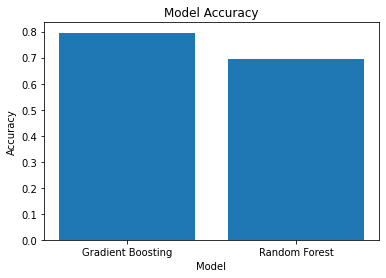

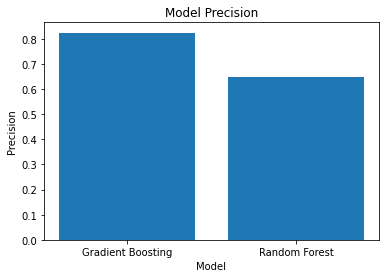

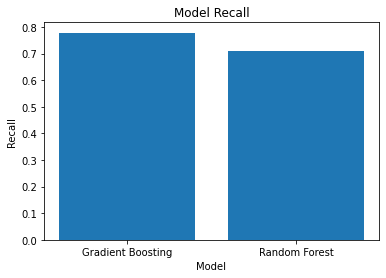

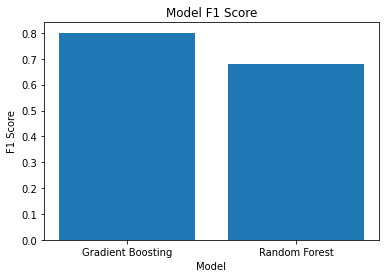

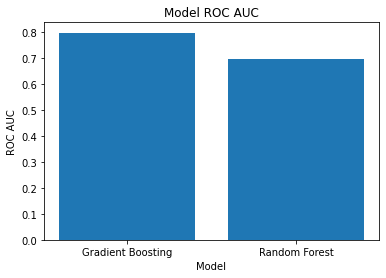

<Figure size 1440x1440 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt

# create lists of the evaluation metrics for each model
accs = [gb_acc, rf_acc]
precs = [gb_prec, rf_prec]
recs = [gb_rec, rf_rec]
f1s = [gb_f1, rf_f1]
aucs = [gb_auc, rf_auc]

# create a bar chart of the accuracy scores
plt.bar(['Gradient Boosting', 'Random Forest'], accs)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# create a bar chart of the precision scores
plt.bar(['Gradient Boosting', 'Random Forest'], precs)
plt.title('Model Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.show()

# create a bar chart of the recall scores
plt.bar(['Gradient Boosting', 'Random Forest'], recs)
plt.title('Model Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.show()

# create a bar chart of the F1 scores
plt.bar(['Gradient Boosting', 'Random Forest'], f1s)
plt.title('Model F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()

# create a bar chart of the ROC AUC scores
plt.bar(['Gradient Boosting', 'Random Forest'], aucs)
plt.title('Model ROC AUC')
plt.xlabel('Model')
plt.ylabel('ROC AUC')
plt.figure(figsize=(20, 20))

plt.show()


In [51]:
from sklearn.ensemble import VotingClassifier

# Define the voting classifier with the two trained models
voting_clf = VotingClassifier(estimators=[('gb', gb_grid.best_estimator_), 
                                          ('rf', rf_grid.best_estimator_)], 
                              voting='hard')

# Fit the voting classifier to the training data
voting_clf.fit(X_train, Y_train)

# Make predictions on the test set using the voting classifier
voting_pred = voting_clf.predict(X_test)

# Compute evaluation metrics for the voting classifier
voting_acc = accuracy_score(voting_pred, Y_test)
voting_prec = precision_score(voting_pred, Y_test)
voting_rec = recall_score(voting_pred, Y_test)
voting_f1 = f1_score(voting_pred, Y_test)
voting_auc = roc_auc_score(voting_pred, Y_test)

# Print evaluation metrics for the voting classifier
print('Voting Classifier:')
print('Accuracy:', voting_acc)
print('Precision:', voting_prec)
print('Recall:', voting_rec)
print('F1-score:', voting_f1)
print('Area under ROC curve:', voting_auc)


Voting Classifier:
Accuracy: 0.7333333333333333
Precision: 0.5941422594142259
Recall: 0.8208092485549133
F1-score: 0.6893203883495146
Area under ROC curve: 0.752424168251398


#SAVING TRAINED MODEL

In [52]:
import pickle

In [53]:
filename = 'Trained model.sav'
pickle.dump(voting_clf, open(filename, 'wb'))


#Loading saved model

In [54]:
loaded_model = pickle.load(open('Trained model.sav', 'rb'))